In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.genfromtxt('./data/kmeans.txt',delimiter='')

In [9]:
def euclDistance(vector1,vector2):
    return np.sqrt(sum((vector2-vector1)**2))
def initCentroids(data,k):
    numSamples,dim=data.shape
    centroids=np.zeros((k,dim))
    for i in range(k):
        index = int(np.random.uniform(0,numSamples))
        centroids[i,:]=data[index,:]
    return centroids
def kmeans(data,k):
    numSamples = data.shape[0]
    clusterData = np.array(np.zeros((numSamples,2)))
    clusterChanged = True
    centroids = initCentroids(data,k)
    while clusterChanged:
        clusterChanged = False
        for i in range(numSamples):
            minDist = 100000.0
            minIndex = 0
            for j in range(k):
                distance=euclDistance(centroids[j,:],data[i,:])
                if distance<minDist:
                    minDist=distance
                    minIndex=j
                    clusterData[i,1]=distance
            if clusterData[i,0]!=minIndex:
                clusterChanged=True
                clusterData[i,0]=minIndex
        for j in range(k):
            cluster_index = np.nonzero(clusterData[:,0]==j)
            pointsInCluster=data[cluster_index]
            centroids[j,:]=np.mean(pointsInCluster,axis=0)
        return centroids,clusterData
def showCluster(data,k,centroids,clusterData):
    numSamples,dim=data.shape
    if dim!=2:
        print('dimension of your data is not 2')
        return 1
    mark = ['or','ob','og','ok','^r','+r','sr','dr','<r','pr']
    if k>len(mark):
        print('Your k is too large')
        return 1
    for i in range(numSamples):
        markIndex = int(clusterData[i,0])
        plt.plot(data[i,0],data[i,1],mark[markIndex])
    mark = ['*r','*b','*g','*k','^b','+b','sb','db','<b','pb']
    for i in range(k):
        plt.plot(centroids[i,0],centroids[i,1],mark[i],markersize=20)
    plt.show()
        

C:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\anaconda\lib\site-packages\numpy\core\_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


cluster complete


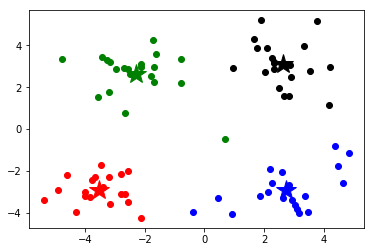

In [10]:
k = 4
min_loss = 10000
min_loss_centroids = np.array([])
min_loss_clusterData = np.array([])

for i in range(50):
    centroids,clusterData=kmeans(data,k)
    loss = sum(clusterData[:,1]/data.shape[0])
    if loss<min_loss:
        min_loss=loss
        min_loss_centroids=centroids
        min_loss_clusterData=clusterData
print('cluster complete')
centroids = min_loss_centroids
clusterData = min_loss_clusterData

showCluster(data,k,centroids,clusterData)

In [11]:
x_test=[0,1]
np.tile(x_test,(k,1))

array([[0, 1],
       [0, 1],
       [0, 1],
       [0, 1]])

In [12]:
np.tile(x_test,(k,1))-centroids

array([[ 3.53973889,  3.89384326],
       [-2.7481024 ,  3.90572575],
       [ 2.31079352, -1.63181095],
       [-2.6265299 , -2.10868015]])

In [13]:
(np.tile(x_test,(k,1))-centroids)**2

array([[12.52975144, 15.16201536],
       [ 7.5520668 , 15.25469363],
       [ 5.33976671,  2.66280698],
       [ 6.89865932,  4.44653198]])

In [14]:
((np.tile(x_test,(k,1))-centroids)**2).sum(axis=1)

array([27.6917668 , 22.80676044,  8.00257369, 11.34519129])

In [15]:
np.argmin(((np.tile(x_test,(k,1))-centroids)**2).sum(axis=1))

2

In [18]:
def predict(datas):
    return np.array([np.argmin(((np.tile(data,(k,1))-centroids)**2).sum(axis=1)) for data in datas])

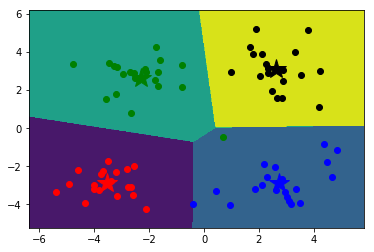

In [19]:
# 获取数据值所在的范围
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

# 生成网格矩阵
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

z = predict(np.c_[xx.ravel(), yy.ravel()])# ravel与flatten类似，多维数据转一维。flatten不会改变原始数据，ravel会改变原始数据
z = z.reshape(xx.shape)
# 等高线图
cs = plt.contourf(xx, yy, z)
# 显示结果
showCluster(data, k, centroids, clusterData)  